In [1]:
import pandas as pd

In [51]:
dataset = pd.read_csv("three_conn/second__connection_topo2_p050.csv")

In [52]:
dataset1 = pd.read_csv("three_conn/first__connection_topo2_p050.csv")

In [53]:
dataset2 = pd.read_csv("three_conn/third__connection_topo2_p050.csv")

In [54]:
df = dataset.append(dataset1)
df = df.append(dataset2)

C:\Users\rkhna\AppData\Local\Temp\ipykernel_5088\3060368886.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = dataset.append(dataset1)
C:\Users\rkhna\AppData\Local\Temp\ipykernel_5088\3060368886.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset2)


In [55]:
df['path'].unique()

array([240.001, 320.001])

In [56]:
for col in df.columns[80:]:
    df[col] = df[col]/df[col].max()

In [183]:
df['pw']/df['pw'].max()

0       0.998453
1       0.998456
2       0.998461
3       0.998463
4       0.998469
          ...   
3235    0.999787
3236    0.999753
3237    0.999707
3238    0.999637
3239    0.999492
Name: pw, Length: 9720, dtype: float64

In [58]:
df.to_csv('three_conn/norm/normalize_connection_topo2_p050.csv')

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [135]:
p0 = pd.read_csv("three_conn/norm/normalize_connection_topo2_p00.csv")
p32 = pd.read_csv("three_conn/norm/normalize_connection_topo2_p032.csv")
p50 = pd.read_csv("three_conn/norm/normalize_connection_topo2_p050.csv")

In [429]:
X = p0.append(p32)
X = X.append(p50)

C:\Users\rkhna\AppData\Local\Temp\ipykernel_5088\3790611022.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = p0.append(p32)
C:\Users\rkhna\AppData\Local\Temp\ipykernel_5088\3790611022.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = X.append(p50)


In [430]:
X.shape

(29160, 90)

In [431]:
X['pw'] = X['pw']/X['pw'].max()

In [409]:
X

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0.6125,0.998453,0.750001,0.745085,0.745085,0.997946,0.997946,1.000000,1.000000
1,1,0,0,0,0,0,0,0,0,0,...,0,0.6125,0.998463,0.750001,0.745064,0.745064,0.997943,0.997943,0.997936,0.997936
2,2,0,0,0,0,0,0,0,0,0,...,0,0.7375,0.998465,0.750001,0.746983,0.746983,0.997509,0.997509,0.997605,0.997605
3,3,0,0,0,0,0,0,0,0,0,...,0,0.6125,0.998469,0.750001,0.745054,0.745054,0.997942,0.997942,0.996913,0.996913
4,4,0,0,0,0,0,0,0,0,0,...,0,0.7375,0.998476,0.750001,0.746962,0.746962,0.997506,0.997506,0.995568,0.995568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,3235,1,1,1,1,1,1,1,1,1,...,1,0.9500,0.999787,1.000000,0.996937,0.996937,0.947943,0.947943,0.841095,0.841095
9716,3236,1,1,1,1,1,1,1,1,1,...,1,0.9625,0.999753,1.000000,0.997275,0.997275,0.947908,0.947908,0.843784,0.843784
9717,3237,1,1,1,1,1,1,1,1,1,...,1,0.9750,0.999707,1.000000,0.997642,0.997642,0.947877,0.947877,0.847499,0.847499
9718,3238,1,1,1,1,1,1,1,1,1,...,1,0.9875,0.999637,1.000000,0.998068,0.998068,0.947851,0.947851,0.853334,0.853334


In [432]:
y=X[X.columns[-1:-4:-2]]

In [433]:
X.drop(X.columns[-1:-4:-2], axis=1, inplace=True)
# X = X[X.columns[:-2]] #remove source osnr/gosnr

In [438]:
data = X.to_numpy()
target = y.to_numpy()

In [439]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = 1)

In [440]:
# LASSO MODEL

C=[5,10,50,100,1000,1500,2000,3000,4000,10000]
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
for Ci in C:
  model = Lasso(alpha=1/(2*Ci),max_iter=7000)
  
  model.fit(X_train,y_train)
  # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
  print(f"{Ci} {model.score(X_test,y_test)}")

5 0.12625599301390955
10 0.1262642259471085
50 0.12627206960623882
100 0.48370125347216786
1000 0.918155163844665
1500 0.9297385340902593
2000 0.9348014805082323
3000 0.9397350193063335
4000 0.9420742116578129
10000 0.9466565915281571


for c= 100 -0.33023971931062185
for c= 100 -1.3927390614184023
for c= 100 -0.5683338698833849
for c= 100 -1358.9757388031876
for c= 100 -0.3903281911899751
for c= 500 0.5781844736310212
for c= 500 0.5600745931453163
for c= 500 0.18795407536130504
for c= 500 -1546.166549596
for c= 500 0.2597106307130733
for c= 1000 0.5764619953816776
for c= 1000 0.6153818298413108
for c= 1000 0.24779861432213113
for c= 1000 -600.6025015529209
for c= 1000 0.34932127352657744
for c= 1500 0.5833429215306593
for c= 1500 0.6270461745871698
for c= 1500 0.28874060024607334
for c= 1500 -370.8880081535832
for c= 1500 0.39035043484396725
for c= 2000 0.5901549342689574
for c= 2000 0.6290471149137863
for c= 2000 0.32792842899074776
for c= 2000 -265.87521190757076
for c= 2000 0.4425410353160958
for c= 3000 0.6440548663373862
for c= 3000 0.7303158117905029
for c= 3000 0.43019692379856794
for c= 3000 -165.85112695343932
for c= 3000 0.5700034205951312
for c= 4000 0.6749930103953179
for c= 4000 0.7807877623005663
for c=

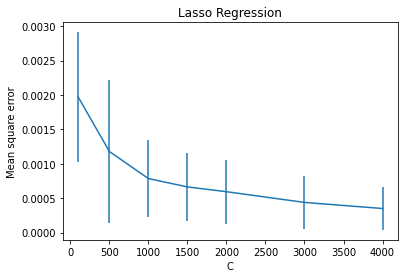

In [374]:
# # LASSO MODEL WITH K_FOLD

# mean_error=[]
# std_error=[]
# C=[100,500,1000,1500,2000,3000,4000]
# from sklearn.linear_model import Lasso

# for Ci in C:
#   model = Lasso(alpha=1/(2*Ci),max_iter=10000)
#   temp=[]
#   from sklearn.model_selection import KFold
#   kf = KFold(n_splits=5)
#   for train,test in kf.split(data):
#     model.fit(data[train],target[train])
#     print(f"for c= {Ci} {model.score(data[test],target[test])}")
#     ypred = model.predict(data[test])
#     from sklearn.metrics import mean_squared_error
#     temp.append(mean_squared_error(target[test],ypred))
#   mean_error.append(np.array(temp).mean())
#   std_error.append(np.array(temp).std())
# print(f"mean error:{mean_error}")
# print(f"std error:{std_error}")

# plt.errorbar(C,mean_error,yerr=std_error)
# plt.xlabel('C'); plt.ylabel('Mean square error')
# plt.title("Lasso Regression")
# plt.show()

In [441]:
C=[5,10,50,100,1000,1500,2000,3000,4000, 5000, 6000, 7000, 10000]
for Ci in C:
  model = Lasso(alpha=1/(2*Ci),max_iter=10000)
  model.fit(X_train,y_train)
  # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
  print(f"{Ci} {model.score(X_test,y_test)}")

5 0.12625599301390955
10 0.1262642259471085
50 0.12627206960623882
100 0.48370125347216786
1000 0.918155163844665
1500 0.9297385340902593
2000 0.9348014805082323
3000 0.9397350193063335
4000 0.9420742116578129
5000 0.9435456187795158
6000 0.9445767201404387
7000 0.9453189474342903
10000 0.9466589075540017


In [443]:
C=[5,10,50,100,1000,1500,2000,3000,4000,10000]
for Ci in C:
  model = Ridge(alpha=1/(2*Ci),max_iter=10000)
  model.fit(X_train,y_train)
  # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
  print(f"{Ci} {model.score(X_test,y_test)}")

5 0.9490262598786774
10 0.949345821355982
50 0.9505651602056502
100 0.9513829383398312
1000 0.9579809356583948
1500 0.9595251950571926
2000 0.9605003738444158
3000 0.9616178936530632
4000 0.962210806741973
10000 0.9631990704920408


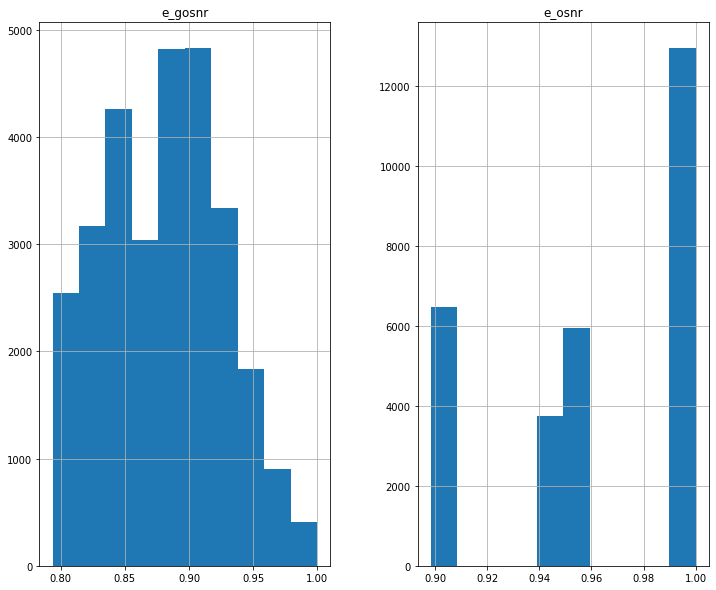

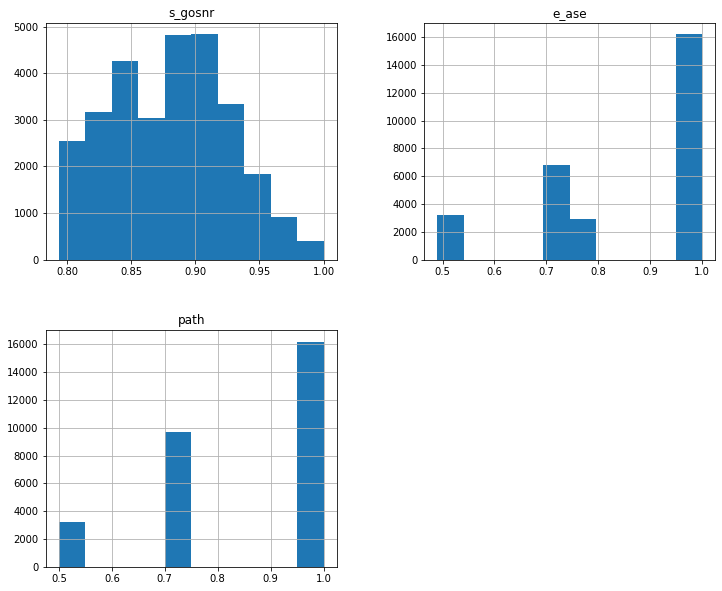

In [247]:
y.hist(figsize = (12,10))
X[X.columns[-1:-6:-2]].hist(figsize = (12,10))
plt.show()

C:\Users\rkhna\AppData\Local\Temp\ipykernel_5088\277410558.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Corr = p0.append(p32)
C:\Users\rkhna\AppData\Local\Temp\ipykernel_5088\277410558.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Corr = Corr.append(p50)


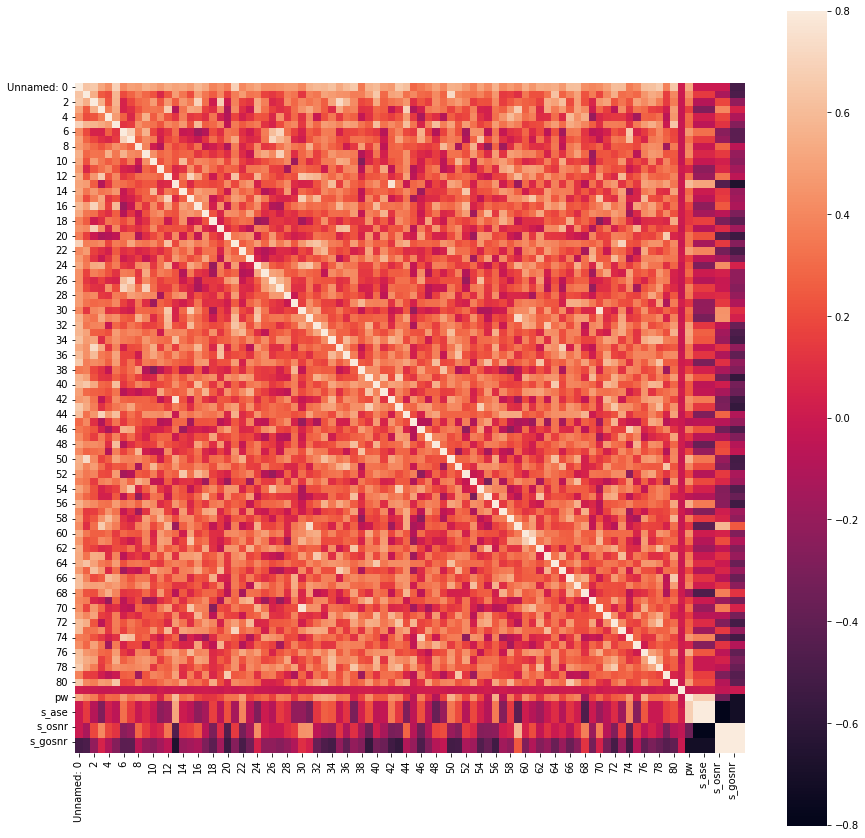

In [259]:
import seaborn as sb
Corr = p0.append(p32)
Corr = Corr.append(p50)
# Corr = pd.DataFrame(np.column_stack((Corr, y['e_gosnr'], y['e_osnr'])))
Cx = Corr.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(Cx, vmax = .8, square = True)
plt.show()

In [264]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse', 'mae', 'accuracy'])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
NN_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 128)               11392     
                                                                 
 dense_88 (Dense)            (None, 256)               33024     
                                                                 
 dense_89 (Dense)            (None, 256)               65792     
                                                                 
 dense_90 (Dense)            (None, 256)               65792     
                                                                 
 dense_91 (Dense)            (None, 1)                 257       
                                                                 
Total params: 176,257
Trainable params: 176,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
577/584 [==========================

Epoch 19/500
581/584 [============================>.] - ETA: 0s - loss: 0.0404 - mse: 0.0023 - mae: 0.0404 - accuracy: 6.9923e-04
Epoch 19: val_loss did not improve from 0.04006
584/584 [==============================] - 2s 3ms/step - loss: 0.0404 - mse: 0.0023 - mae: 0.0404 - accuracy: 6.9660e-04 - val_loss: 0.0403 - val_mse: 0.0024 - val_mae: 0.0403 - val_accuracy: 2.1432e-04
Epoch 20/500
572/584 [============================>.] - ETA: 0s - loss: 0.0405 - mse: 0.0023 - mae: 0.0405 - accuracy: 7.1023e-04
Epoch 20: val_loss did not improve from 0.04006
584/584 [==============================] - 2s 3ms/step - loss: 0.0405 - mse: 0.0023 - mae: 0.0405 - accuracy: 6.9660e-04 - val_loss: 0.0418 - val_mse: 0.0025 - val_mae: 0.0418 - val_accuracy: 2.1432e-04
Epoch 21/500
572/584 [============================>.] - ETA: 0s - loss: 0.0404 - mse: 0.0023 - mae: 0.0404 - accuracy: 7.1023e-04
Epoch 21: val_loss did not improve from 0.04006
584/584 [==============================] - 2s 3ms/step - los

563/584 [===========================>..] - ETA: 0s - loss: 0.0402 - mse: 0.0023 - mae: 0.0402 - accuracy: 7.2158e-04
Epoch 40: val_loss did not improve from 0.04003
584/584 [==============================] - 1s 2ms/step - loss: 0.0402 - mse: 0.0023 - mae: 0.0402 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0024 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 41/500
580/584 [============================>.] - ETA: 0s - loss: 0.0403 - mse: 0.0023 - mae: 0.0403 - accuracy: 7.0043e-04
Epoch 41: val_loss did not improve from 0.04003
584/584 [==============================] - 2s 3ms/step - loss: 0.0403 - mse: 0.0023 - mae: 0.0403 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0021 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 42/500
571/584 [============================>.] - ETA: 0s - loss: 0.0403 - mse: 0.0023 - mae: 0.0403 - accuracy: 7.1147e-04
Epoch 42: val_loss did not improve from 0.04003
584/584 [==============================] - 2s 3ms/step - loss: 0.0403 - m

584/584 [==============================] - 3s 6ms/step - loss: 0.0402 - mse: 0.0022 - mae: 0.0402 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0022 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 62/500
578/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 7.0285e-04
Epoch 62: val_loss did not improve from 0.04003
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0402 - val_mse: 0.0021 - val_mae: 0.0402 - val_accuracy: 2.1432e-04
Epoch 63/500
568/584 [============================>.] - ETA: 0s - loss: 0.0402 - mse: 0.0022 - mae: 0.0402 - accuracy: 7.1523e-04
Epoch 63: val_loss improved from 0.04003 to 0.04002, saving model to Weights-063--0.04002.hdf5
584/584 [==============================] - 2s 4ms/step - loss: 0.0402 - mse: 0.0022 - mae: 0.0402 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0023 - val_mae: 0.0400 - val_accuracy:

Epoch 83/500
569/584 [============================>.] - ETA: 0s - loss: 0.0402 - mse: 0.0022 - mae: 0.0402 - accuracy: 6.8651e-04
Epoch 83: val_loss did not improve from 0.04002
584/584 [==============================] - 2s 3ms/step - loss: 0.0402 - mse: 0.0022 - mae: 0.0402 - accuracy: 6.9660e-04 - val_loss: 0.0402 - val_mse: 0.0021 - val_mae: 0.0402 - val_accuracy: 2.1432e-04
Epoch 84/500
564/584 [===========================>..] - ETA: 0s - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 7.2030e-04
Epoch 84: val_loss did not improve from 0.04002
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0021 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 85/500
576/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 7.0530e-04
Epoch 85: val_loss did not improve from 0.04002
584/584 [==============================] - 2s 3ms/step - los

581/584 [============================>.] - ETA: 0s - loss: 0.0402 - mse: 0.0023 - mae: 0.0402 - accuracy: 6.7233e-04
Epoch 104: val_loss did not improve from 0.04001
584/584 [==============================] - 2s 3ms/step - loss: 0.0402 - mse: 0.0023 - mae: 0.0402 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0021 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 105/500
576/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 7.0530e-04
Epoch 105: val_loss did not improve from 0.04001
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0405 - val_mse: 0.0020 - val_mae: 0.0405 - val_accuracy: 2.1432e-04
Epoch 106/500
566/584 [============================>.] - ETA: 0s - loss: 0.0402 - mse: 0.0023 - mae: 0.0402 - accuracy: 6.9015e-04
Epoch 106: val_loss did not improve from 0.04001
584/584 [==============================] - 2s 3ms/step - loss: 0.040

584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0022 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 126/500
572/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 7.1023e-04
Epoch 126: val_loss did not improve from 0.04001
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0023 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 127/500
578/584 [============================>.] - ETA: 0s - loss: 0.0402 - mse: 0.0023 - mae: 0.0402 - accuracy: 6.7582e-04
Epoch 127: val_loss did not improve from 0.04001
584/584 [==============================] - 2s 3ms/step - loss: 0.0402 - mse: 0.0023 - mae: 0.0402 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0022 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 128/500
583/584 [========

Epoch 147/500
581/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9923e-04
Epoch 147: val_loss did not improve from 0.04001
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0021 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 148/500
582/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9802e-04
Epoch 148: val_loss did not improve from 0.04001
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0022 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 149/500
583/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.9683e-04
Epoch 149: val_loss did not improve from 0.04001
584/584 [==============================] - 2s 3ms/step

573/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 7.0899e-04
Epoch 168: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0024 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 169/500
573/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 7.0899e-04
Epoch 169: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0024 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 170/500
563/584 [===========================>..] - ETA: 0s - loss: 0.0402 - mse: 0.0023 - mae: 0.0402 - accuracy: 6.3832e-04
Epoch 170: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.040

584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0025 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 190/500
582/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9802e-04
Epoch 190: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0023 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 191/500
569/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.8651e-04
Epoch 191: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0402 - val_mse: 0.0023 - val_mae: 0.0402 - val_accuracy: 2.1432e-04
Epoch 192/500
567/584 [========

Epoch 211/500
584/584 [==============================] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04
Epoch 211: val_loss did not improve from 0.04000
584/584 [==============================] - 3s 5ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0024 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 212/500
576/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 7.0530e-04
Epoch 212: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0024 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 213/500
570/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.8531e-04
Epoch 213: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step

584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0024 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0022 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 233/500
562/584 [===========================>..] - ETA: 0s - loss: 0.0401 - mse: 0.0024 - mae: 0.0401 - accuracy: 6.6726e-04
Epoch 233: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0024 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0023 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 234/500
572/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0024 - mae: 0.0401 - accuracy: 7.1023e-04
Epoch 234: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0024 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0024 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 235/500
574/584 [========

Epoch 254/500
583/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.9683e-04
Epoch 254: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0020 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 255/500
573/584 [============================>.] - ETA: 0s - loss: 0.0402 - mse: 0.0023 - mae: 0.0402 - accuracy: 7.0899e-04
Epoch 255: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0402 - mse: 0.0023 - mae: 0.0402 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0023 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 256/500
574/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 7.0775e-04
Epoch 256: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step

584/584 [==============================] - 2s 3ms/step - loss: 0.0402 - mse: 0.0024 - mae: 0.0402 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0022 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 276/500
577/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 7.0407e-04
Epoch 276: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0022 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 277/500
570/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 7.1272e-04
Epoch 277: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0023 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 278/500
568/584 [========

Epoch 297/500
570/584 [============================>.] - ETA: 0s - loss: 0.0403 - mse: 0.0023 - mae: 0.0403 - accuracy: 7.1272e-04
Epoch 297: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0403 - mse: 0.0023 - mae: 0.0403 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0022 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 298/500
574/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.8053e-04
Epoch 298: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0022 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 299/500
575/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0022 - mae: 0.0401 - accuracy: 7.0652e-04
Epoch 299: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step

584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0024 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0025 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 319/500
568/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0024 - mae: 0.0401 - accuracy: 6.8772e-04
Epoch 319: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0024 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0025 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 320/500
584/584 [==============================] - ETA: 0s - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04
Epoch 320: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0023 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0022 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 321/500
575/584 [========

Epoch 340/500
574/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.8053e-04
Epoch 340: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0402 - val_mse: 0.0026 - val_mae: 0.0402 - val_accuracy: 2.1432e-04
Epoch 341/500
573/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 7.0899e-04
Epoch 341: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0024 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 342/500
566/584 [============================>.] - ETA: 0s - loss: 0.0402 - mse: 0.0025 - mae: 0.0402 - accuracy: 7.1776e-04
Epoch 342: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step

584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0025 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 362/500
568/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 7.1523e-04
Epoch 362: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0024 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 363/500
578/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0026 - mae: 0.0401 - accuracy: 7.0285e-04
Epoch 363: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0026 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0025 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 364/500
576/584 [========

Epoch 383/500
584/584 [==============================] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04
Epoch 383: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0026 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 384/500
581/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9923e-04
Epoch 384: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0024 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 385/500
564/584 [===========================>..] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 7.2030e-04
Epoch 385: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step

584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0026 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0025 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 405/500
574/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 7.0775e-04
Epoch 405: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0029 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 406/500
584/584 [==============================] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04
Epoch 406: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0024 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 407/500
578/584 [========

Epoch 426/500
582/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9802e-04
Epoch 426: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0027 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 427/500
570/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.8531e-04
Epoch 427: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0024 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 428/500
569/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.8651e-04
Epoch 428: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step

584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0028 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 448/500
568/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0026 - mae: 0.0401 - accuracy: 7.1523e-04
Epoch 448: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0026 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0027 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 449/500
578/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 7.0285e-04
Epoch 449: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0027 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 450/500
580/584 [========

Epoch 469/500
572/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.5559e-04
Epoch 469: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0026 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 470/500
570/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 7.1272e-04
Epoch 470: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0026 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 471/500
568/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 7.1523e-04
Epoch 471: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step

584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0026 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0024 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 491/500
583/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9683e-04
Epoch 491: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0401 - val_mse: 0.0024 - val_mae: 0.0401 - val_accuracy: 2.1432e-04
Epoch 492/500
567/584 [============================>.] - ETA: 0s - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.6138e-04
Epoch 492: val_loss did not improve from 0.04000
584/584 [==============================] - 2s 3ms/step - loss: 0.0401 - mse: 0.0025 - mae: 0.0401 - accuracy: 6.9660e-04 - val_loss: 0.0400 - val_mse: 0.0026 - val_mae: 0.0400 - val_accuracy: 2.1432e-04
Epoch 493/500
576/584 [========

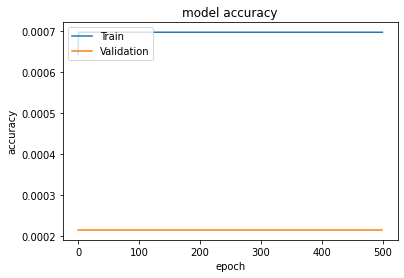

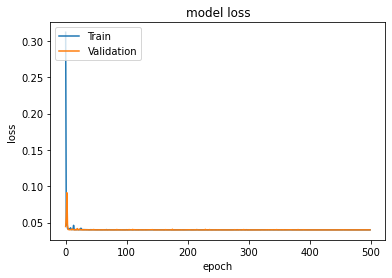

In [268]:
NN_model.history.history.keys()
plt.plot(NN_model.history.history['accuracy'])
plt.plot(NN_model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(NN_model.history.history['loss'])
plt.plot(NN_model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

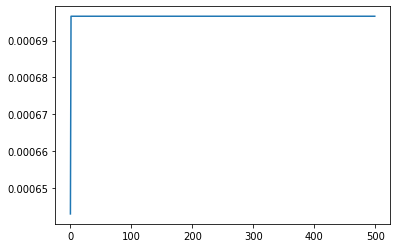

In [270]:
pyplot.plot(NN_model.history.history['accuracy'])
pyplot.show()

In [265]:
# from keras.callbacks import ModelCheckpoint

# model = Sequential()
# model.add(Dense(128, activation="relu", input_dim=88))
# model.add(Dense(32, activation="relu"))
# model.add(Dense(8, activation="relu"))
# model.add(Dense(1, activation="linear"))
# model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200),  metrics=['accuracy'])
# # es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# # acc = EarlyStopping(monitor='acc', baseline=1.0, patience=0, verbose = 1)
# # mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=100, verbose=1)

In [266]:
# from keras.callbacks import ModelCheckpoint

# model = Sequential()
# model.add(Dense(1536, input_dim=88, activation='relu'))
# model.add(Dropout(.3))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(.3))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(.3))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200),  metrics=['accuracy'])
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10000000, batch_size=100, verbose=1,
#                     callbacks=[es, mc])

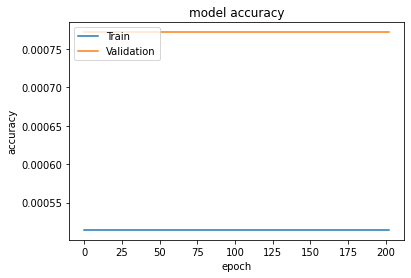

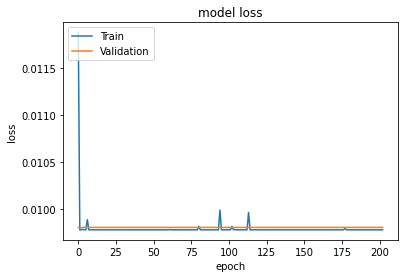

In [216]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

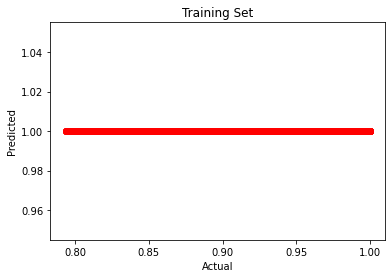

In [231]:
ypred = model.predict(X_test)
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(y_test, ypred, 'ro')
plt.show()

In [444]:
# RANDOM FOREST MODEL

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.25, random_state = 14)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

model = RandomForestRegressor()
model.fit(train_X,train_y)
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)
# Display accuracy score
print(f'Random forest accuracy = ', model.score(val_X, val_y))

Random forest validation MAE =  0.00010433594391549322
Random forest accuracy =  0.9995217535578333


for c= 100 score=0.5118451363740693 fold0
for c= 100 score=0.35267364341867524 fold1
for c= 100 score=0.36437198583283337 fold2
for c= 100 score=0.6663626435792618 fold3
for c= 100 score=0.244566113920623 fold4
for c= 200 score=0.5111390000156535 fold0
for c= 200 score=0.44483064797536875 fold1
for c= 200 score=0.3672076584702699 fold2
for c= 200 score=0.6741521833397285 fold3
for c= 200 score=0.2210149412850284 fold4
for c= 300 score=0.5114884266280563 fold0
for c= 300 score=0.4424709581244352 fold1
for c= 300 score=0.3669492624290884 fold2
for c= 300 score=0.6956155472922605 fold3
for c= 300 score=0.24020000253876905 fold4
for c= 1000 score=0.5111103746040453 fold0
for c= 1000 score=0.47257439956728237 fold1
for c= 1000 score=0.3632093298835986 fold2
for c= 1000 score=0.681701907428294 fold3
for c= 1000 score=0.23688048950720564 fold4
Mean Square error [0.0006348667791234879, 0.000624372618028231, 0.0006218308110274419, 0.0006203885672032333]
Std  error [0.0005599871219730087, 0.0005

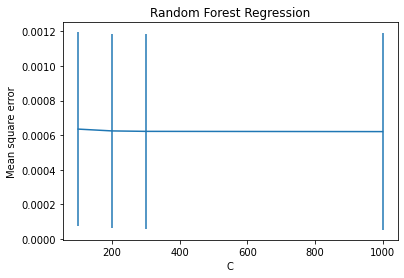

In [445]:
# RANDOM FOREST MODEL WITH ESTIMATORS

estimators=[100, 200, 300, 1000]
mean_error=[]
std_error=[]
for Ei in estimators:
  model = RandomForestRegressor(n_estimators=Ei)
  temp=[]
  from sklearn.model_selection import KFold
  kf = KFold(n_splits=5)
  kfld=0
  for train,test in kf.split(X):
    model.fit(data[train],target[train])
    ypred = model.predict(data[test])
    from sklearn.metrics import mean_squared_error
    temp.append(mean_squared_error(target[test],ypred))
    print(f"for c= {Ei} score={model.score(data[test],target[test])} fold{kfld}")
    kfld+=1
  mean_error.append(np.array(temp).mean())
  std_error.append(np.array(temp).std())

print(f"Mean Square error {mean_error}")
print(f"Std  error {std_error}")
plt.errorbar(estimators,mean_error,yerr=std_error)
plt.xlabel('C'); plt.ylabel('Mean square error')
plt.title("Random Forest Regression")
plt.show()

In [446]:
X

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,ch,pw,path,s_ase,e_ase
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6125,0.998453,0.750001,0.745085,0.745085
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6125,0.998463,0.750001,0.745064,0.745064
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.7375,0.998465,0.750001,0.746983,0.746983
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6125,0.998469,0.750001,0.745054,0.745054
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.7375,0.998476,0.750001,0.746962,0.746962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,3235,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.9500,0.999787,1.000000,0.996937,0.996937
9716,3236,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.9625,0.999753,1.000000,0.997275,0.997275
9717,3237,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.9750,0.999707,1.000000,0.997642,0.997642
9718,3238,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.9875,0.999637,1.000000,0.998068,0.998068


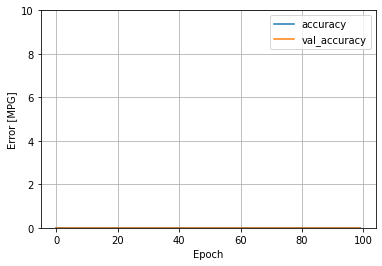

In [306]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

def plot_acc(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

#plot_loss(history)
plot_acc(history)

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model = Sequential()
model.add(Dense(20, input_dim=86, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy', 'mse', 'mae', 'mape'])
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)
yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)


Epoch 1/150
611/611 - 1s - loss: 814.7249 - accuracy: 3.8389e-04 - mse: 814.7249 - mae: 5.7562 - mape: 632.7617 - 1s/epoch - 2ms/step
Epoch 2/150
611/611 - 1s - loss: 0.2723 - accuracy: 3.3270e-04 - mse: 0.2723 - mae: 0.4089 - mape: 44.4208 - 717ms/epoch - 1ms/step
Epoch 3/150
611/611 - 1s - loss: 0.1155 - accuracy: 4.0948e-04 - mse: 0.1155 - mae: 0.2719 - mape: 29.5401 - 658ms/epoch - 1ms/step
Epoch 4/150
611/611 - 1s - loss: 0.0654 - accuracy: 4.3507e-04 - mse: 0.0654 - mae: 0.2053 - mape: 22.3599 - 654ms/epoch - 1ms/step
Epoch 5/150
611/611 - 1s - loss: 0.0508 - accuracy: 4.8626e-04 - mse: 0.0508 - mae: 0.1805 - mape: 19.6784 - 668ms/epoch - 1ms/step
Epoch 6/150
611/611 - 1s - loss: 0.0383 - accuracy: 5.1185e-04 - mse: 0.0383 - mae: 0.1556 - mape: 16.9759 - 635ms/epoch - 1ms/step
Epoch 7/150
611/611 - 1s - loss: 0.0369 - accuracy: 5.1185e-04 - mse: 0.0369 - mae: 0.1497 - mape: 16.3460 - 630ms/epoch - 1ms/step
Epoch 8/150
611/611 - 1s - loss: 0.0307 - accuracy: 5.3744e-04 - mse: 0.03

KeyboardInterrupt: 

In [347]:
error = mean_absolute_error(y_test['e_osnr'], yhat)
print('MAE: %.3f' % error)

MAE: 0.015


In [453]:
xtrain = X_train.to_numpy().reshape(-1,1)
xtest = X_test.to_numpy().reshape(-1,1)
ytrain = y_train.to_numpy().reshape(-1,1)
ytest = y_test.to_numpy().reshape(-1,1)

(2507760, 1)

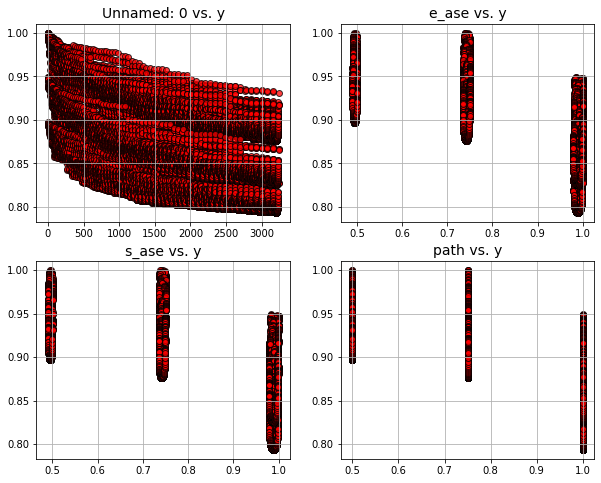

In [493]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(X[X.columns[-i]],y['e_gosnr'],edgecolor='k',color='red',alpha=0.75)
    ax[i].set_title(f"{X.columns[-i]} vs. y",fontsize=14)
    ax[i].grid(True)
plt.show()

In [515]:
# LINEARREGRESSION MODEL 

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train) 
print("accuracy score for linear: ", linear.score(X_test,y_test))
print("RMSE for linear :",np.sqrt(mean_squared_error(y_test,linear.predict(X_test))))

accuracy score for linear:  0.9641622051048012
RMSE for linear : 0.008266933581190624
